In [10]:
library(data.table)
library(dplyr)

In [1]:
expression_dir = "/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data"
list.files(expression_dir, pattern = "*.RData")

[1] "breast_expression.RData"      "liver_expression.RData"      
[3] "safe_drug_combinations.RData"

In [2]:
list.files(expression_dir)

[1] "Approved_drug_Information.txt" "breast_expression.RData"      
 [3] "core.81095"                    "ddi_data (1).xlsx"            
 [5] "ddi_data.xlsx"                 "deepddi_model.h5"             
 [7] "drug_foodb_tanimoto_PCA50.csv" "drug_foodb_tanimoto.csv"      
 [9] "drug_similarity.csv"           "drugbank"                     
[11] "DrugBank_known_ddi.txt"        "DrugBank_known_ddi.xlsx"      
[13] "DrugBank5.0_Approved_drugs"    "effect_nsides-2019-11-13.sql" 
[15] "IGC50.xlsx"                    "Interaction_information.csv"  
[17] "KnownDDI.csv"                  "liver_expression.RData"       
[19] "multilabelbinarizer.pkl"       "my_graph.pdf"                 
[21] "Output_Cleanup-Copy1.ipynb"    "PCA_tanimoto_model_50.pkl"    
[23] "safe_drug_combinations.RData"  "safe_drug_combos.csv"         
[25] "tanimoto_info_PCA50.csv"       "TWOSIDES.csv"                 
[27] "v0.1.md"

In [3]:
ln <- load("/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/liver_expression.RData")
ln

[1] "ds_hepg2" "ds_huh7"  "ds_phh"

In [4]:
ds_hepg2

Loading required package: cmapR



Formal class 'GCT' [package "cmapR"] with 7 slots
  ..@ mat    : num [1:12328, 1:5774] 0.234 -0.178 -1.036 0.731 -0.253 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:12328] "5720" "466" "6009" "2309" ...
  .. .. ..$ : chr [1:5774] "CPC004_HEPG2_6H:BRD-K20482099-001-01-1:10" "CPC004_HEPG2_6H:BRD-K03670461-001-02-0:10" "CPC004_HEPG2_6H:BRD-K36737713-001-01-6:10" "CPC004_HEPG2_6H:BRD-A14966924-001-03-0:10" ...
  ..@ rid    : chr [1:12328] "5720" "466" "6009" "2309" ...
  ..@ cid    : chr [1:5774] "CPC004_HEPG2_6H:BRD-K20482099-001-01-1:10" "CPC004_HEPG2_6H:BRD-K03670461-001-02-0:10" "CPC004_HEPG2_6H:BRD-K36737713-001-01-6:10" "CPC004_HEPG2_6H:BRD-A14966924-001-03-0:10" ...
  ..@ rdesc  :'data.frame':	12328 obs. of  1 variable:
  .. ..$ id: Factor w/ 12328 levels "10","100","1000",..: 7802 5334 8203 2459 4803 4518 5139 8087 2703 9049 ...
  ..@ cdesc  :'data.frame':	5774 obs. of  13 variables:
  .. ..$ id            : chr [1:5774] "CPC004_HEPG2_6H:BRD-K20482099-001-01-1:10

In [5]:
ln <- load("/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/breast_expression.RData")
ln

[1] "ds_mcf7"

In [6]:
ds_mcf7


Formal class 'GCT' [package "cmapR"] with 7 slots
  ..@ mat    : num [1:12328, 1:29312] -0.0394 0.1382 -0.3131 -0.1152 -0.9035 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:12328] "5720" "466" "6009" "2309" ...
  .. .. ..$ : chr [1:29312] "CPC004_MCF7_6H:BRD-A66861218-001-03-5:10" "CPC004_MCF7_6H:BRD-A29322418-237-03-2:10" "CPC004_MCF7_6H:BRD-K08109516-001-02-9:10" "CPC004_MCF7_6H:BRD-K88741031-001-01-0:10" ...
  ..@ rid    : chr [1:12328] "5720" "466" "6009" "2309" ...
  ..@ cid    : chr [1:29312] "CPC004_MCF7_6H:BRD-A66861218-001-03-5:10" "CPC004_MCF7_6H:BRD-A29322418-237-03-2:10" "CPC004_MCF7_6H:BRD-K08109516-001-02-9:10" "CPC004_MCF7_6H:BRD-K88741031-001-01-0:10" ...
  ..@ rdesc  :'data.frame':	12328 obs. of  1 variable:
  .. ..$ id: Factor w/ 12328 levels "10","100","1000",..: 7802 5334 8203 2459 4803 4518 5139 8087 2703 9049 ...
  ..@ cdesc  :'data.frame':	29312 obs. of  13 variables:
  .. ..$ id            : chr [1:29312] "CPC004_MCF7_6H:BRD-A66861218-001-03-5:

In [8]:
length(ds_mcf7@cdesc$pert_iname)
head(ds_mcf7@cdesc$pert_iname)

[1] 29312

[1] "BRD-A66861218"                 "canrenoic-acid"               
[3] "L-701324"                      "methyl-2,5-dihydroxycinnamate"
[5] "BRD-K16604360"                 "rutin"

In [21]:
sum(startsWith(ds_mcf7@cdesc$pert_id, "BRD"))

[1] 29292

In [22]:
length(grep(ds_mcf7@cdesc$pert_id, "BRD", value = T))

Warning message in grep(ds_mcf7@cdesc$pert_id, "BRD", value = T):
“argument 'pattern' has length > 1 and only the first element will be used”


[1] 0

In [11]:
map_df <- fread("/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/drugbank/data/mapping/lincs.tsv")
head(map_df)


drugbank_id,lincs_id
<chr>,<chr>
DB00091,LSM-1507
DB00091,LSM-1703
DB00091,LSM-2280
DB00121,LSM-3994
DB00121,LSM-5727
DB00121,LSM-6430


In [20]:
dim(map_df)

[1] 1783    2

In [14]:
map_lincs <- fread("/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/LincsID2FacilityID_LINCS_StandardizedCmpds_LSMIDs.txt")

In [15]:
head(map_lincs)

SM_LINCS_ID,SM_Center_Canonical_ID
<chr>,<chr>
LSM-1001,PCCSE_Roscovitine
LSM-1001,10001
LSM-1001,BRD-K07691486
LSM-1002,BRD-K68191783
LSM-1002,10002
LSM-1003,10003


In [17]:
length(unique(map_lincs$SM_LINCS_ID))
length(unique(map_lincs$SM_Center_Canonical_ID))

[1] 41847

[1] 42587

In [30]:
map_df_combined <- map_df %>% 
    inner_join(map_lincs, by = c("lincs_id" = "SM_LINCS_ID"))

In [31]:
dim(map_df_combined)

[1] 1918    3

In [32]:
head(map_df_combined)

,drugbank_id,lincs_id,SM_Center_Canonical_ID
,<chr>,<chr>,<chr>
1,DB00091,LSM-1703,BRD-A64290322
2,DB00091,LSM-2280,BRD-K03222093
3,DB00121,LSM-3994,BRD-K89210380
4,DB00121,LSM-5727,BRD-K63899271
5,DB00121,LSM-6430,BRD-A36603537
6,DB00130,LSM-4741,BRD-K83896451


In [36]:
map_df_combined$drugbank_int <- as.numeric(substr(map_df_combined$drugbank, 3,7))

In [37]:
head(map_df_combined)

,drugbank_id,lincs_id,SM_Center_Canonical_ID,drugbank_int
,<chr>,<chr>,<chr>,<dbl>
1,DB00091,LSM-1703,BRD-A64290322,91
2,DB00091,LSM-2280,BRD-K03222093,91
3,DB00121,LSM-3994,BRD-K89210380,121
4,DB00121,LSM-5727,BRD-K63899271,121
5,DB00121,LSM-6430,BRD-A36603537,121
6,DB00130,LSM-4741,BRD-K83896451,130


In [33]:
length(unique(map_df_combined$drugbank_id))

[1] 1232

In [23]:
sum(ds_mcf7@cdesc$pert_id %in% map_df_combined$SM_Center_Canonical_ID)

[1] 6217

In [26]:
# ddi data
x_data <- fread("../../data//X_matrix_ddi.txt")
ddi <- fread("../../data/ddi.txt")

In [25]:
dim(x_data)

[1] 27675  4318

In [27]:
dim(ddi)

[1] 27675     3

In [28]:
head(ddi)

V1,V2,V3
<dbl>,<dbl>,<dbl>
956,316,0
977,717,0
977,957,0
1060,766,0
1395,977,0
367,977,0


In [35]:
drug_ddi_list <- unique(c(ddi$V1, ddi$V2))
length(drug_ddi_list)

[1] 1115

In [39]:
map_df_combined_ddi <- map_df_combined %>% 
    filter(drugbank_int %in% drug_ddi_list)
head(map_df_combined_ddi)
dim(map_df_combined_ddi)

,drugbank_id,lincs_id,SM_Center_Canonical_ID,drugbank_int
,<chr>,<chr>,<chr>,<dbl>
1,DB00091,LSM-1703,BRD-A64290322,91
2,DB00091,LSM-2280,BRD-K03222093,91
3,DB00121,LSM-3994,BRD-K89210380,121
4,DB00121,LSM-5727,BRD-K63899271,121
5,DB00121,LSM-6430,BRD-A36603537,121
6,DB00162,LSM-5317,BRD-K64634304,162


[1] 1086    4

In [43]:
length(unique(map_df_combined_ddi$drugbank_id))

[1] 665

In [40]:
ds <- ds_mcf7

In [42]:
sum(ds@cdesc$pert_id %in% map_df_combined_ddi$SM_Center_Canonical_ID)
sum(map_df_combined_ddi$SM_Center_Canonical_ID %in% ds@cdesc$pert_id)

[1] 3915

[1] 853

In [ ]:
idx <- match(map_df_combined_ddi$SM_Center_Canonical_ID, ds@cdesc$pert_id)

In [45]:
map_df_combined_lincs <- map_df_combined_ddi %>% 
    filter(SM_Center_Canonical_ID %in% ds@cdesc$pert_id)

In [46]:
dim(map_df_combined_lincs)


[1] 853   4

In [89]:
head(map_df_combined_lincs)

,drugbank_id,lincs_id,SM_Center_Canonical_ID,drugbank_int
,<chr>,<chr>,<chr>,<dbl>
1,DB00091,LSM-1703,BRD-A64290322,91
2,DB00091,LSM-2280,BRD-K03222093,91
3,DB00121,LSM-3994,BRD-K89210380,121
4,DB00121,LSM-5727,BRD-K63899271,121
5,DB00162,LSM-5317,BRD-K64634304,162
6,DB00175,LSM-1760,BRD-A71816415,175


In [90]:
map_df_combined_lincs[1:20,]

,drugbank_id,lincs_id,SM_Center_Canonical_ID,drugbank_int
,<chr>,<chr>,<chr>,<dbl>
1,DB00091,LSM-1703,BRD-A64290322,91
2,DB00091,LSM-2280,BRD-K03222093,91
3,DB00121,LSM-3994,BRD-K89210380,121
4,DB00121,LSM-5727,BRD-K63899271,121
5,DB00162,LSM-5317,BRD-K64634304,162
6,DB00175,LSM-1760,BRD-A71816415,175
7,DB00175,LSM-3347,BRD-K60511616,175
8,DB00175,LSM-4966,BRD-A11170096,175
9,DB00175,LSM-5402,BRD-K25841245,175


In [108]:
length(unique(map_df_combined_lincs$drugbank_id))

[1] 634

In [44]:
dim(ds@mat)

[1] 12328 29312

In [48]:
exp_mat <- matrix(NA, nrow(map_df_combined_lincs), nrow(ds@mat))
for (i in 1:nrow(map_df_combined_lincs)) {
    idx <- which(ds@cdesc$pert_id == map_df_combined_lincs$SM_Center_Canonical_ID[i])
    tmp_exp <- ds@mat[, idx]
    if (length(idx) > 1) {
        tmp_exp <- apply(tmp_exp, 1, mean)
    }
    exp_mat[i, ] <- tmp_exp
}


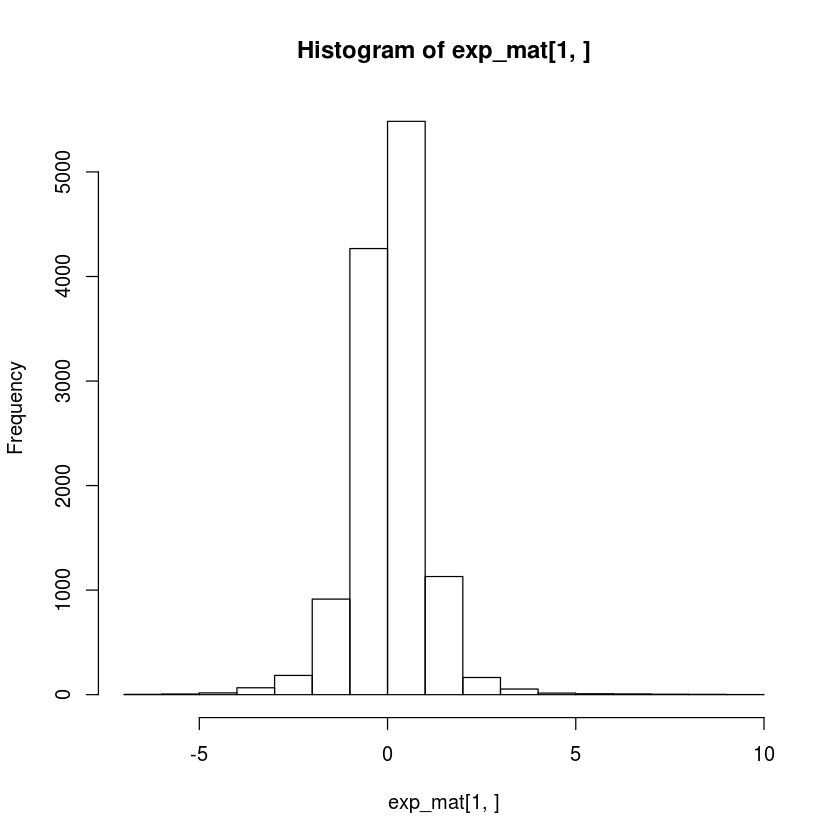

In [50]:
hist(exp_mat[1,])

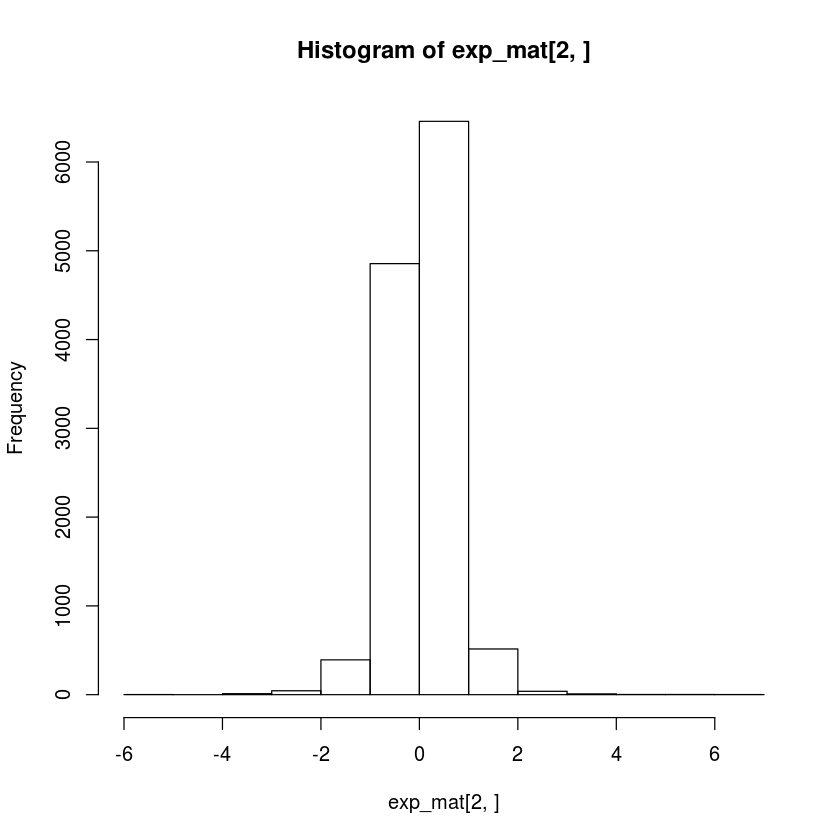

In [52]:
hist(exp_mat[2, ])

In [49]:
exp_mat[1:10,1:10]

-0.7424861,2.102285266,0.67904139,2.56373215,-0.35978770,0.9477953,1.38571215,1.068171829,-0.9185094,0.79458255
-0.2226045,-0.359131590,-0.24221936,1.23400086,-0.04692942,0.8951315,0.59367621,-0.096957147,0.5793950,0.61711317
-1.6605222,-0.894259870,1.60439253,0.39311048,1.97515419,0.6926679,1.01892914,0.816475593,-0.6556101,-0.16660994
-0.1116475,-0.478727415,-0.32470304,-0.83103293,0.66460609,0.7128411,1.74925708,0.064524099,-0.2675870,1.04076356
0.2659007,-0.008961081,-0.65021690,2.12272673,-0.29033772,0.1055251,0.19058173,-0.132083184,-0.2812655,0.05248093
0.5701167,0.107202619,0.04968408,0.05710252,-0.43755282,-0.4775886,0.35481985,0.004824787,-0.3132516,-0.30461022
-0.1205500,-0.500128855,-0.26819725,-0.31390354,-0.06237208,0.2925707,0.09146938,-0.002449983,1.3251592,-0.10310830
0.1486328,1.114018857,-0.40291058,0.82200807,0.46679196,0.2281849,0.66621852,0.217940010,-1.0307780,0.49215023
0.1620384,0.091649532,-0.37687979,-0.39564985,0.48415062,-1.0697848,-0.27558114,-0.514675871,1.7610022,0.01970724
0.9397250,0.106975004,0.77480003,-0.46144998,0.05852500,0.2086750,0.08919999,-0.300900012,-0.3362500,-0.09629999


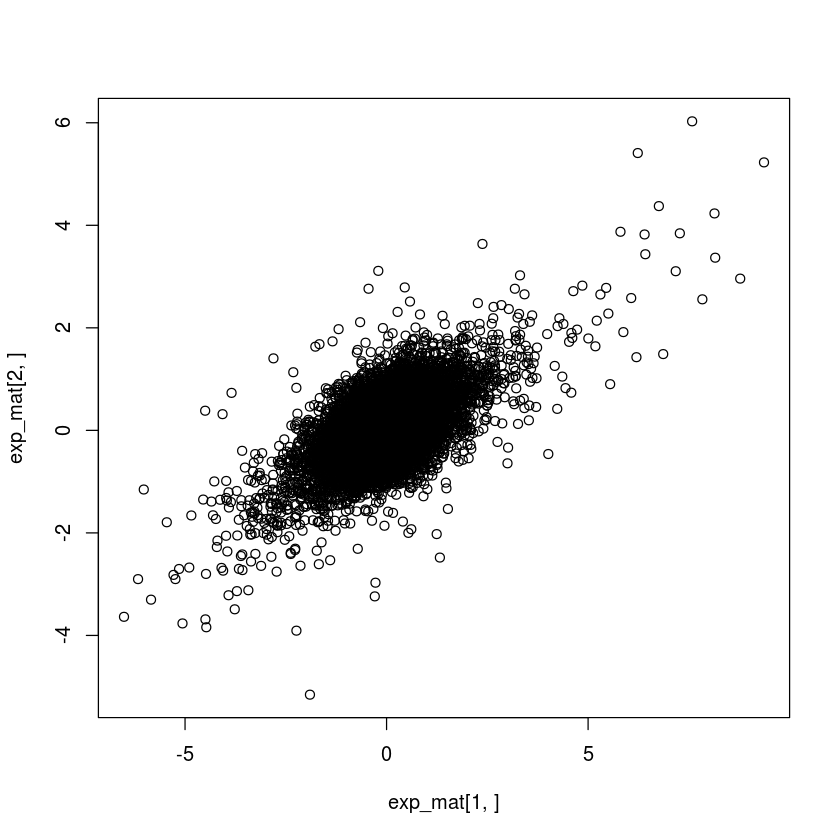

In [53]:
plot(exp_mat[1, ], exp_mat[2, ])

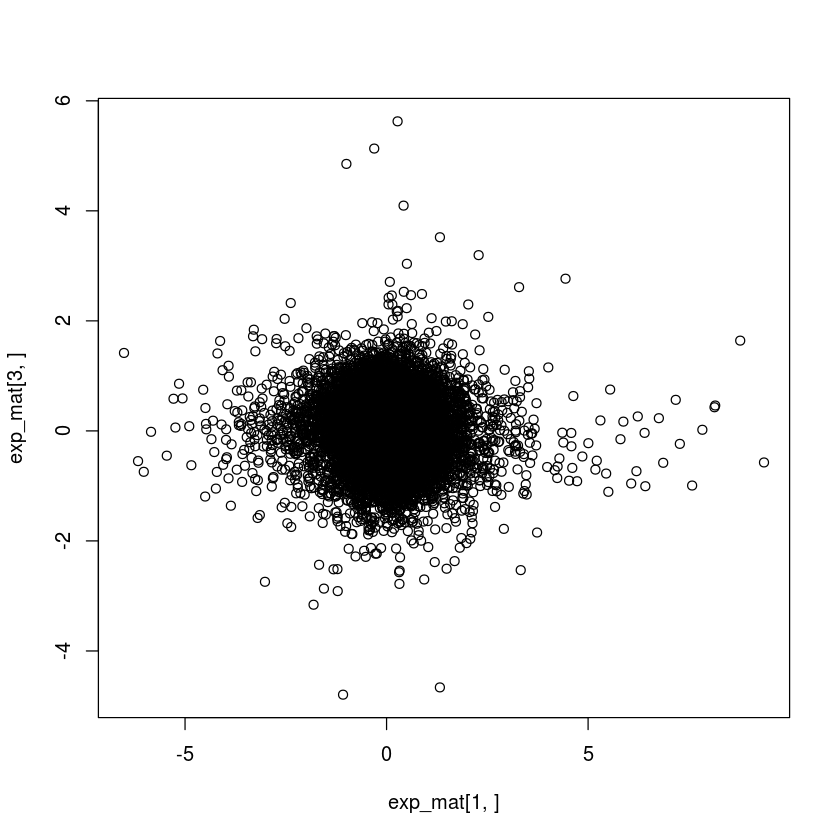

In [54]:
plot(exp_mat[1, ], exp_mat[3, ])

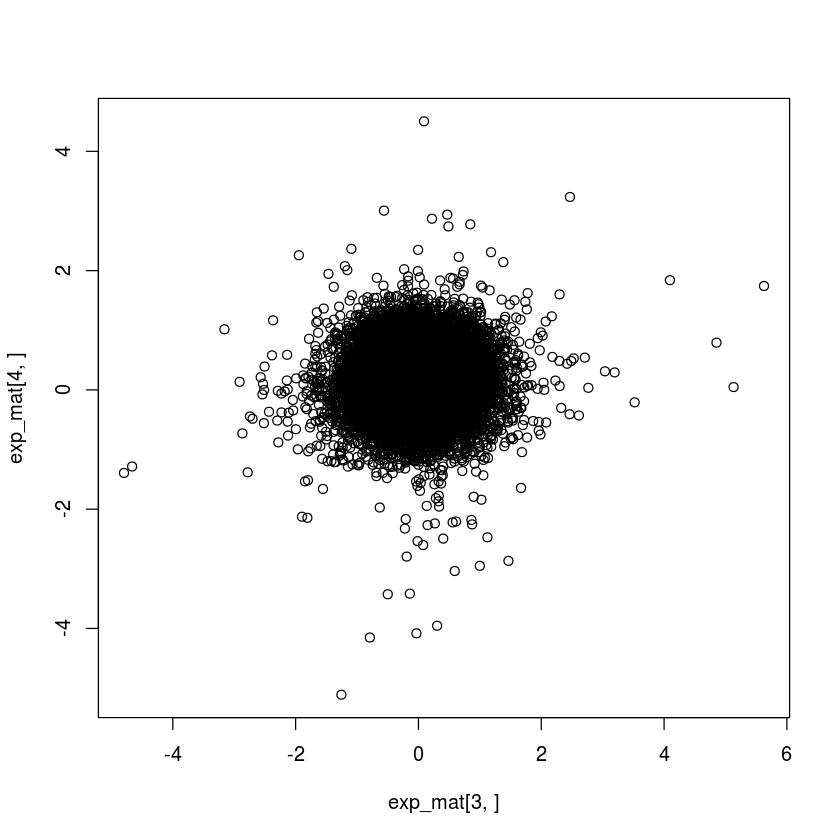

In [55]:
plot(exp_mat[3, ], exp_mat[4, ])

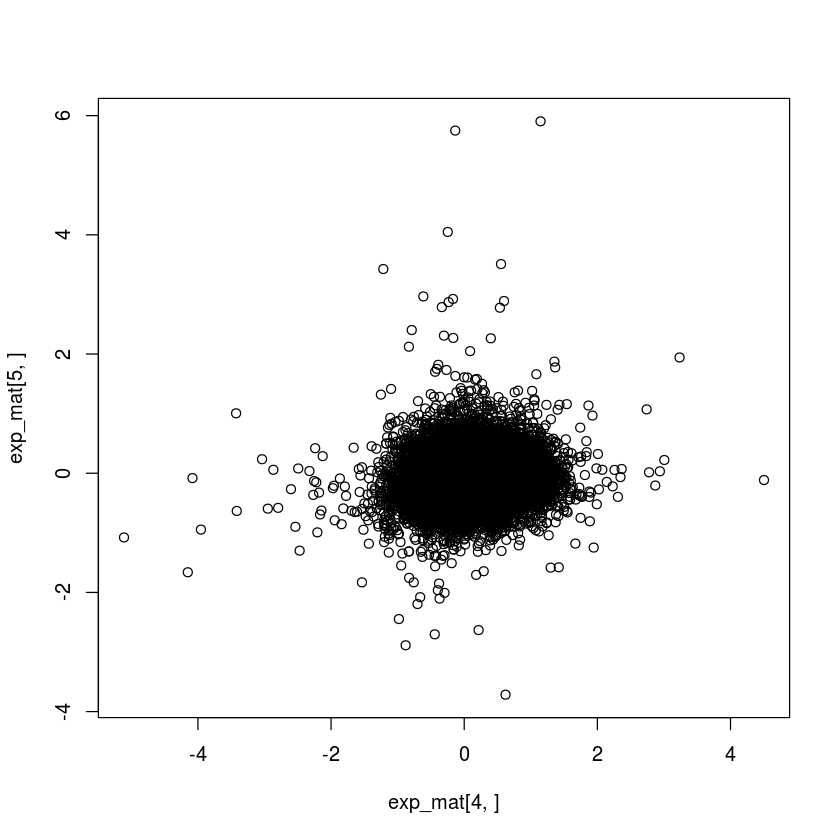

In [56]:
plot(exp_mat[4, ], exp_mat[5, ])

In [ ]:
# statin drugs


In [58]:
getwd()

[1] "/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/code/xgboost"

In [59]:
target_df <- fread("/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/drugbank/data/proteins.tsv")
head(target_df)

drugbank_id,category,uniprot_id,entrez_gene_id,organism,known_action,actions,pubmed_ids
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
DB00001,target,P00734,2147,Human,yes,inhibitor,10505536|10912644|11055889|11467439|11807012|11752352
DB00006,target,P00734,2147,Human,yes,inhibitor,11060732|11504570|11833835|11923794|11929334|11752352
DB00025,enzyme,P00734,2147,Human,unknown,activator,10688826|1139038|12463731|2402772|3099625
DB00055,target,P00734,2147,Human,unknown,,10463819|12062545|12070133|12208873|12296618
DB00100,target,P00734,2147,Human,unknown,,10498586|10499904|10499905|10648407|11019961
DB00170,target,P00734,2147,Human,unknown,activator,10469489|2484931|2922761|6867080|7657295


In [60]:
table(target_df$category)


    carrier      enzyme      target transporter 
        320        3547       14282        1757 

In [62]:
table_res <- table(target_df$entrez_gene_id)

In [66]:
table_res_sorted <- sort(table_res, decreasing = T)

In [69]:
head(table_res_sorted, breaks = 50)


1576 1565 5243 1559 1544 1557 
 550  308  302  281  256  218 

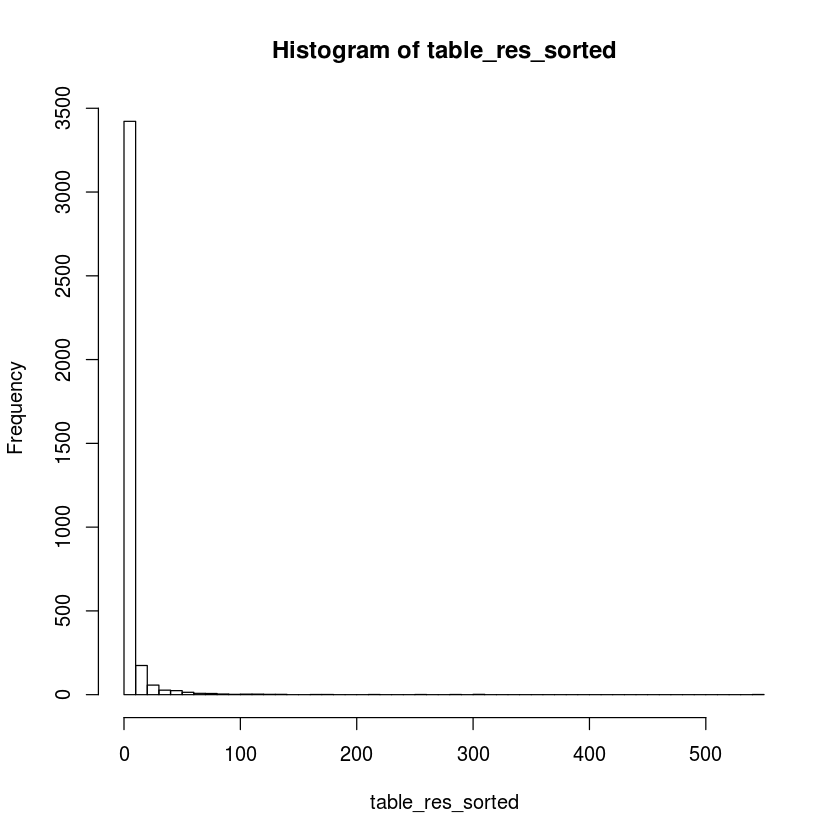

In [70]:
hist(table_res_sorted, breaks = 50)

In [72]:
sum(table_res_sorted > 5)

[1] 652

In [73]:
head(table_res_sorted > 5)

1576 1565 5243 1559 1544 1557 
TRUE TRUE TRUE TRUE TRUE TRUE

In [94]:
target_list <- names(table_res_sorted)[table_res_sorted > 10]

In [95]:
head(target_list)

[1] "1576" "1565" "5243" "1559" "1544" "1557"

In [96]:
length(unique(target_df$entrez_gene_id))

[1] 3757

In [97]:
length(target_list)
sum(target_list %in% ds@rdesc$id)

[1] 335

[1] 275

In [98]:
target_idx <- match(target_list, ds@rdesc$id)
target_idx_nn <- !is.na(target_idx)
target_list_nn <- target_list[target_idx_nn]
target_idx_lincs <- target_idx[target_idx_nn]

In [99]:
exp_mat_target <- exp_mat[, target_idx_lincs]

In [100]:
dim(exp_mat_target)

[1] 853 275

In [104]:
save(exp_mat_target, exp_mat, target_list_nn, file = "/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/drugbank/data/lincs_data_target_275_0424.RData")

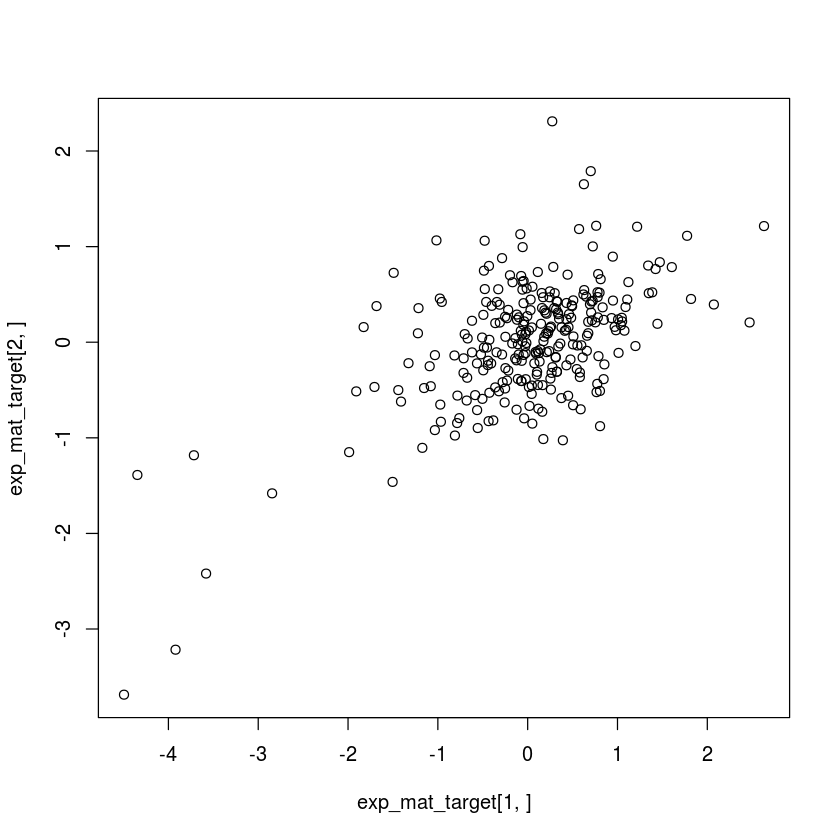

In [101]:
plot(exp_mat_target[1, ], exp_mat_target[2, ])

In [103]:
cor(exp_mat[1, ], exp_mat[2, ])
cor(exp_mat_target[1, ], exp_mat_target[2, ])

[1] 0.6086967

[1] 0.5824504

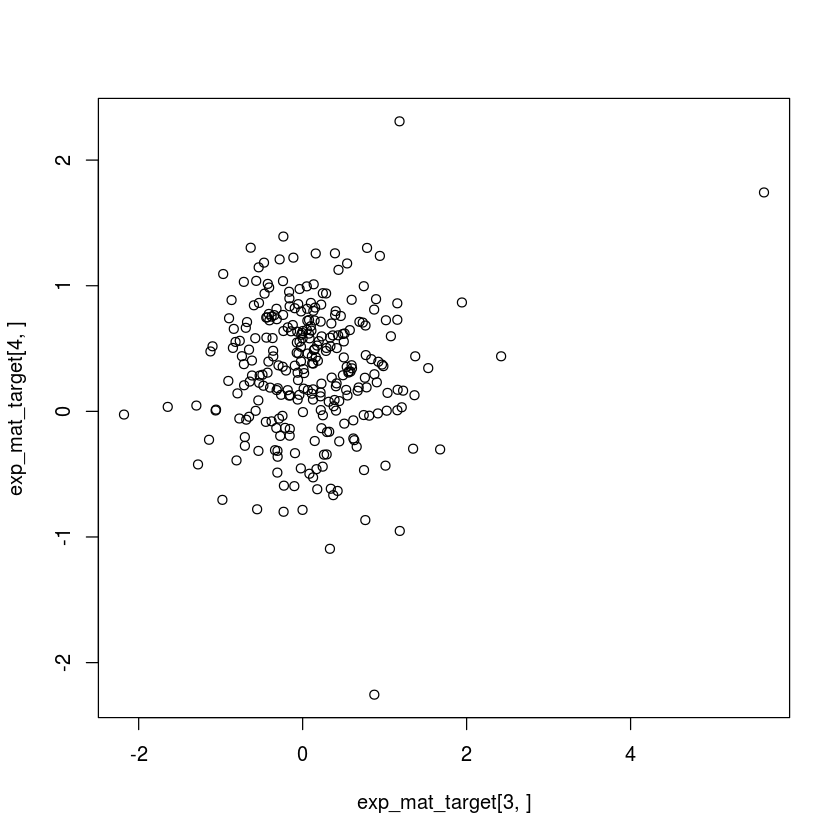

In [105]:
plot(exp_mat_target[3, ], exp_mat_target[4, ])

In [106]:
cor(exp_mat[8, ], exp_mat[9, ])

[1] 0.1576009

In [107]:
cor(exp_mat_target[8, ], exp_mat_target[9, ])

[1] 0.143266

In [114]:
drugbank_id_lincs <- unique(map_df_combined_lincs$drugbank_id)
drugbank_id_lincs_int <- as.numeric(substr(drugbank_id_lincs, 3, 7))

In [115]:
filter_ddi <- (ddi$V1 %in% drugbank_id_lincs_int) & (ddi$V2 %in% drugbank_id_lincs_int)

In [116]:
ddi_filtered <- ddi[filter_ddi, ]

In [119]:
dim(ddi_filtered)
head(ddi_filtered)
table(ddi_filtered$V3)

[1] 11652     3

V1,V2,V3
<dbl>,<dbl>,<dbl>
977,717,0
977,957,0
1060,766,0
367,977,0
331,1261,0
736,999,0



   0   15   16   18   20   32   54   72   76   80 
5835  103 1276    1 2936  265  492  555  168   21 

In [120]:
head(drugbank_id_lincs)
dim(exp_mat_target)

[1] 853 275

In [121]:
id_exp_list <- list()
for (i in 1:length(drugbank_id_lincs)) {
    idx <- which(map_df_combined_lincs$drugbank_int == drugbank_id_lincs_int[i])[1]
    id_exp_list[[drugbank_id_lincs_int[i]]] <- exp_mat_target[idx, ]
}


In [126]:
X_data <- matrix(NA, nrow(ddi_filtered), 2*ncol(exp_mat_target))
for (i in 1:nrow(X_data)) {
    if (i %% 500 == 0) { 
        print(paste0("INFO: ", i))
    }
    exp_a <- id_exp_list[[ddi_filtered$V1[i]]]
    exp_b <- id_exp_list[[ddi_filtered$V2[i]]]
    X_data[i, ] <- c(exp_a, exp_b)
}

[1] "INFO: 500"
[1] "INFO: 1000"
[1] "INFO: 1500"
[1] "INFO: 2000"
[1] "INFO: 2500"
[1] "INFO: 3000"
[1] "INFO: 3500"
[1] "INFO: 4000"
[1] "INFO: 4500"
[1] "INFO: 5000"
[1] "INFO: 5500"
[1] "INFO: 6000"
[1] "INFO: 6500"
[1] "INFO: 7000"
[1] "INFO: 7500"
[1] "INFO: 8000"
[1] "INFO: 8500"
[1] "INFO: 9000"
[1] "INFO: 9500"
[1] "INFO: 10000"
[1] "INFO: 10500"
[1] "INFO: 11000"
[1] "INFO: 11500"


In [127]:
dim(X_data)

[1] 11652   550

In [128]:
dim(ddi_filtered)

[1] 11652     3

In [131]:
write.table(X_data, file = "/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/X_matrix_exp275.txt",
           quote = F, row.names = F, sep = "\t")
write.table(ddi_filtered, file = "/gpfs/loomis/pi/zhao2/zy92/projects/ddipred/ddi_pred/data/ddi_matrix_exp275.txt",
           quote = F, row.names = F, sep = "\t")

In [ ]:
write.csv()

In [ ]:
x_tr

In [ ]:
extract_exp <- function() {
    
}